In [1]:
import sys
sys.path.append('../..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from random import random
from datetime import datetime
from tqdm import tqdm

from config import client
from mlpp.data_collection import curve_utils
from mlpp.data_collection.sample import ScoresSubset
from mlpp.data_collection.sample_func import displacement_err, SampleConfig, SampleFunctionGenerator as SFG

In [23]:
NUM_BINS = 200
MAX_PP = 20000
DATE_LIMIT = datetime(2019,1,1)
SAMPLE_CONFIG = SampleConfig(date_limit = DATE_LIMIT, max_pp = MAX_PP, n_bins = NUM_BINS)

In [158]:
osu_db = client['osu_random_db']
val_db = client['val_random_db']
subset_3k = ScoresSubset(osu_db.osu_scores_high, osu_db.osu_user_stats)
# subset_3k = ScoresSubset(val_db.osu_scores_high, val_db.osu_user_stats)

In [232]:
a = -7
get_b = lambda x: (np.log(2-x) - a) / x / 20000

In [233]:
def linear_exp(a, b, x):
    return np.exp(a + b * x)

In [234]:
S = .5

b = get_b(S)
f = lambda x: linear_exp(a, b, x)

In [235]:
data = subset_3k.simulate(f, SAMPLE_CONFIG)

In [236]:
len(data)

138047

(array([1740., 1277., 1257., 1172., 1473., 1090., 1489., 1768., 2295.,
        2220., 2456., 2110., 3066., 2340., 2232., 2278., 2548., 3327.,
        2712., 2944., 3083., 3798., 5670., 4616., 3721., 5113., 3552.,
        5783., 4912., 2647., 4257., 4223., 5328., 6597., 4596., 2783.,
        2195., 6985., 5270., 1542., 2242., 1309., 2012., 1016.,  557.,
         237.,  512.,  623.,  808.,  266.]),
 array([2.50000020e-01, 2.44570671e+02, 4.88891341e+02, 7.33212012e+02,
        9.77532682e+02, 1.22185335e+03, 1.46617402e+03, 1.71049469e+03,
        1.95481536e+03, 2.19913603e+03, 2.44345670e+03, 2.68777738e+03,
        2.93209805e+03, 3.17641872e+03, 3.42073939e+03, 3.66506006e+03,
        3.90938073e+03, 4.15370140e+03, 4.39802207e+03, 4.64234274e+03,
        4.88666341e+03, 5.13098408e+03, 5.37530475e+03, 5.61962542e+03,
        5.86394609e+03, 6.10826676e+03, 6.35258743e+03, 6.59690810e+03,
        6.84122877e+03, 7.08554944e+03, 7.32987011e+03, 7.57419079e+03,
        7.81851146e+03, 

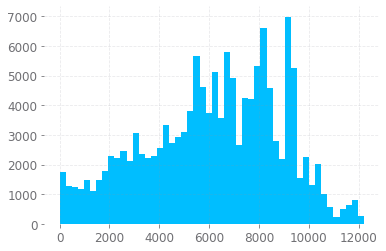

In [237]:
plt.hist(data, bins= 50)

In [165]:
displacement_err(data)

0.20781434793896214